# Tema 5 Tratamiento Digital del Sonido


### Rebeca Goya Esteban y Óscar Barquero Pérez

update: 23 de noviembre de 2020

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## Introducción

Para la realización de los ejercicios necesitará el siguiente material:

* Fichero de audio *confront.wav*.
* Las funciones: *espectro_ventanas*, *energia*, *vozSS*, *myspectra*, *my_spectrogram*, *predlin*, *myceps*, *zcr* que se encuentran en el módulo tds_utils.py

## Ejercicio 1. Reproducción de señales de audio

En este ejercicio debera leer una señal de audio en formato .wav y reproducirlo. Existen diferentes forma de realizar una reproducción desde Python. Vamos a utilizar la herramienta del módulo soundevice. Si realizó correctamente la instalación del envrionmnet,  ya tendrá instalado el módulo correspondiente.

* 1.1- Lea en primer lugar el fichero de audio **confront.wav**. Deberá consultar la ayuda del módulo scipy.io.wavfile. Después ejecute los siguientes comandos

```python
import scipy.io.wavfile as wf

filename = 'confront.wav'

fs,y = wf.read(filename)

```

In [2]:
%matplotlib notebook
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import scipy.io.wavfile as wf

filename = 'confront.wav'

fs,y = wf.read(filename)
y.shape  #número de muestras
print(fs)




11000


* 1.2- A continuación reproduzca la señal utilizando el siguiente comando

```python
import sounddevice as sd
sd.play(y,fs)
```

donde $fs$ representa la frecuencia de muestreo de la señal. Este parámetro lo ha obtenido con la lectura del fichero .wav. ¿Cuál es la frecuencia de muestro de esta señal?.

* 1.3- Reproduzca la señal también a la mitad y al doble de la frecuencia de muestreo

In [3]:
#Play the signal at fs
import sounddevice as sd
sd.play(y,fs)



In [4]:
#Play the signal at fs/2
import sounddevice as sd
sd.play(y,fs/2)


In [5]:
#Play the signal at 2*fs
import sounddevice as sd
sd.play(y,2*fs)

* 1.4-Visualice la señal de voz. Es decir cree un plot de la señal con un eje de tiempos adecuado

<IPython.core.display.Javascript object>


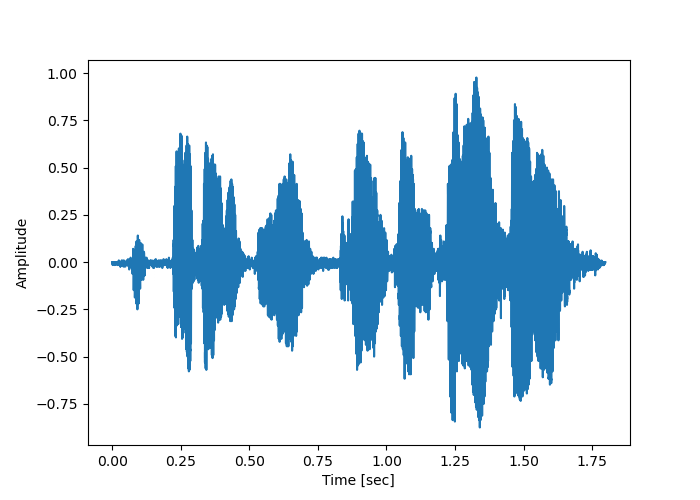

Text(0, 0.5, 'Amplitude')

In [6]:
#plot wav signal

#time vector
t= np.arange(0,len(y))/fs

plt.figure(figsize = (7,5))

#plot figure

plt.plot(t,y)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

## Ejercicio 2. Enventanado

* 2.1-Represente en el dominio temporal las ventanas Rectangular y Hamming. Para ello, cree primero las ventanas con los comandos:

```python
import scipy.signal as sig
r = sig.boxcar(N)
h = sig.hamming(N)
```
donde $N$ es el número de muestras de la ventana. Obtenga N para que el tamaño de la ventana sea de 20 msg.

* Obseve sus perfiles, ¿qué ventana introduciría menor distorsión en el dominio temporal?

<IPython.core.display.Javascript object>


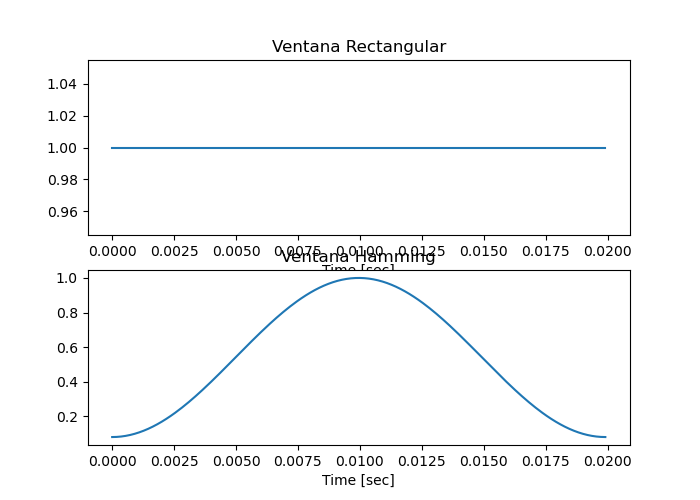

Text(0.5, 1.0, 'Ventana Hamming')

In [8]:
#import tds.utils.py
import sys
sys.path.append('../') #allows to import a module in a diff folder
from tds_utils import *
import scipy.signal as sig


N= int(11000*0.02) #length in samples

r = sig.boxcar(N)    #rectangular window
h = sig.hamming(N)      #hamming window

t = np.arange(0,len(r))/fs #time in sec

plt.figure(figsize = (7,5))
plt.subplot(211)

#plot rectangular window
plt.plot(t,r)
plt.xlabel('Time [sec]')
plt.title('Ventana Rectangular')

plt.subplot(212)

#plot hamming window
plt.plot(t,h)
plt.xlabel('Time [sec]')
plt.title('Ventana Hamming')


* 2.2- Para representar las ventanas en el dominio frecuencial utilice la función *espectro_ventanas* del módulo tds_utils.py

```python
espectro_ventanas(r,h)
```
* Compare los espectro de las ventanas: anchura del lóbulo principal, nivel de los lóbulos secundarios.

/home/alumno/anaconda3/bin/tema5_student/tds_utils.py:143: RuntimeWarning: divide by zero encountered in log10
  r_psd = 20*np.log10(np.abs(np.fft.fftshift(Rect_Frec)))


<IPython.core.display.Javascript object>


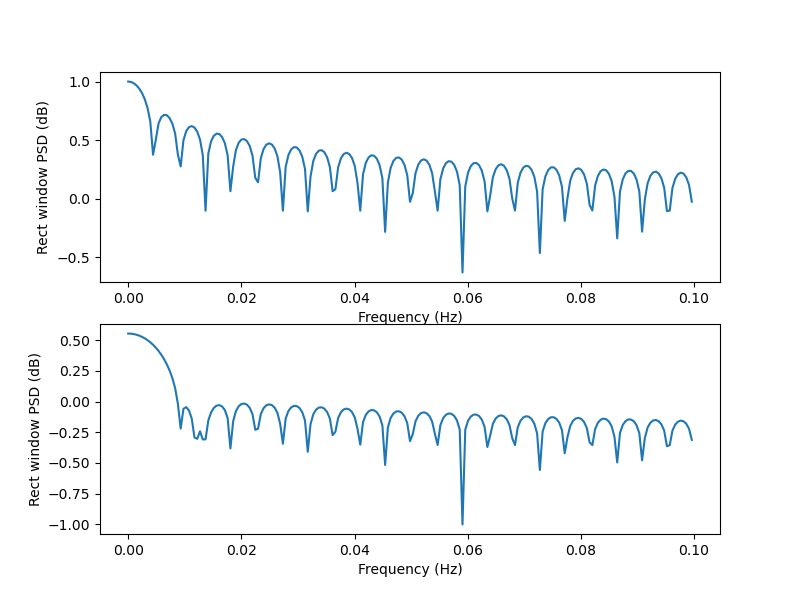

Text(0, 0.5, 'Rect window PSD (dB)')

In [9]:
#windows psd stimation

r_psd_20,h_psd_20, f_20 = espectro_ventanas(r,h)

#plot
plt.figure(figsize = (8,6))

plt.subplot(211)
#plot rectangular window spectrum
plt.plot(f_20, r_psd_20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')

plt.subplot(212)
#plot hamming window spectrum

plt.plot(f_20, h_psd_20)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')

* 2.3- Varíe la longitud de las ventanas (pruebe, por ejemplo una ventana de 10 ms y una de 30 ms) y observe el efecto en los espectros de las ventanas (anchura del lóbulo principal, nivel de los lóbulos secundarios).

/home/alumno/anaconda3/bin/tema5_student/tds_utils.py:143: RuntimeWarning: divide by zero encountered in log10
  r_psd = 20*np.log10(np.abs(np.fft.fftshift(Rect_Frec)))
/home/alumno/anaconda3/bin/tema5_student/tds_utils.py:144: RuntimeWarning: divide by zero encountered in log10
  h_psd = 20*np.log10(np.abs(np.fft.fftshift(Hamm_Frec)))


<IPython.core.display.Javascript object>


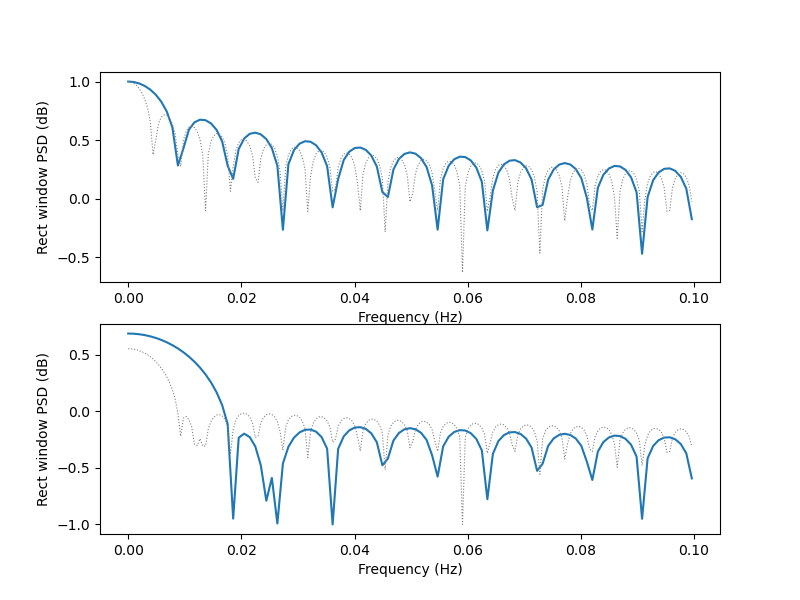

Text(0, 0.5, 'Rect window PSD (dB)')

In [10]:
# ventana de 10 ms
N= int(11000 * 0.01) #length in samples

r =  sig.boxcar(N)  #rectangular window
h =  sig.hamming(N)#hamming window

#windows psd stimation
r_psd_10,h_psd_10, f_10 = espectro_ventanas(r,h)


#plot
plt.figure(figsize = (8,6))

plt.subplot(211)
plt.plot(f_10,r_psd_10)
plt.plot(f_20,r_psd_20,':',color='grey',linewidth = 0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')

plt.subplot(212)
plt.plot(f_10,h_psd_10)
plt.plot(f_20,h_psd_20,':',color='grey',linewidth = 0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')


/home/alumno/anaconda3/bin/tema5_student/tds_utils.py:143: RuntimeWarning: divide by zero encountered in log10
  r_psd = 20*np.log10(np.abs(np.fft.fftshift(Rect_Frec)))
/home/alumno/anaconda3/bin/tema5_student/tds_utils.py:144: RuntimeWarning: divide by zero encountered in log10
  h_psd = 20*np.log10(np.abs(np.fft.fftshift(Hamm_Frec)))


<IPython.core.display.Javascript object>


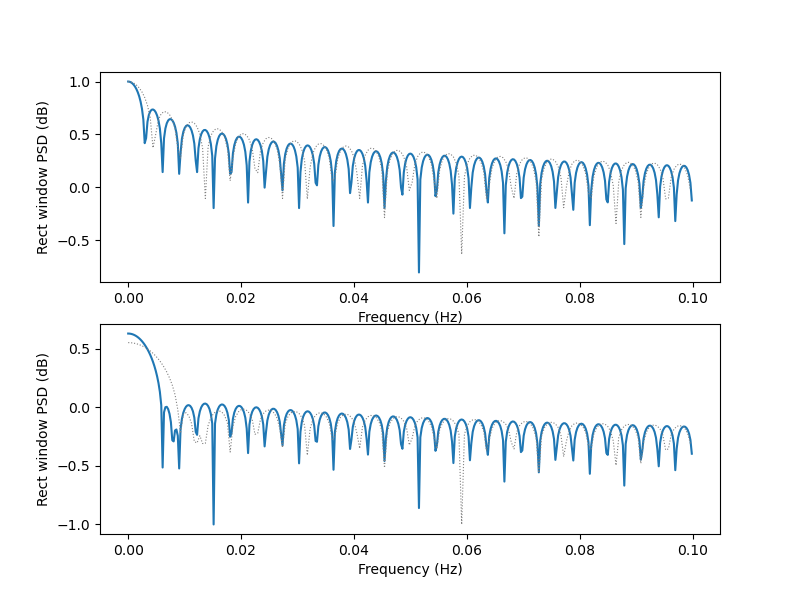

Text(0, 0.5, 'Rect window PSD (dB)')

In [11]:
# ventana de 30 ms
N= int(11000 * 0.03) #length in samples

r =  sig.boxcar(N)  #rectangular window
h =  sig.hamming(N)#hamming window

#windows psd stimation
r_psd_10,h_psd_10, f_10 = espectro_ventanas(r,h)


#plot
plt.figure(figsize = (8,6))

plt.subplot(211)
plt.plot(f_10,r_psd_10)
plt.plot(f_20,r_psd_20,':',color='grey',linewidth = 0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')

plt.subplot(212)
plt.plot(f_10,h_psd_10)
plt.plot(f_20,h_psd_20,':',color='grey',linewidth = 0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')




## Ejercicio 3. Energía localizada y tasa de cruces por cero

* 3.1- Seleccione el segmento de la señal de voz ($y$) entre las muestras 15500-19500. Obtenga la evolución de la energía con el tiempo utilizando una ventana hamming de 20 ms, utilice para ello la función *energia* del módulo *tds_utils.py*

```python
energia(seg,h)
#seg trama de señal, h ventana
```

<IPython.core.display.Javascript object>


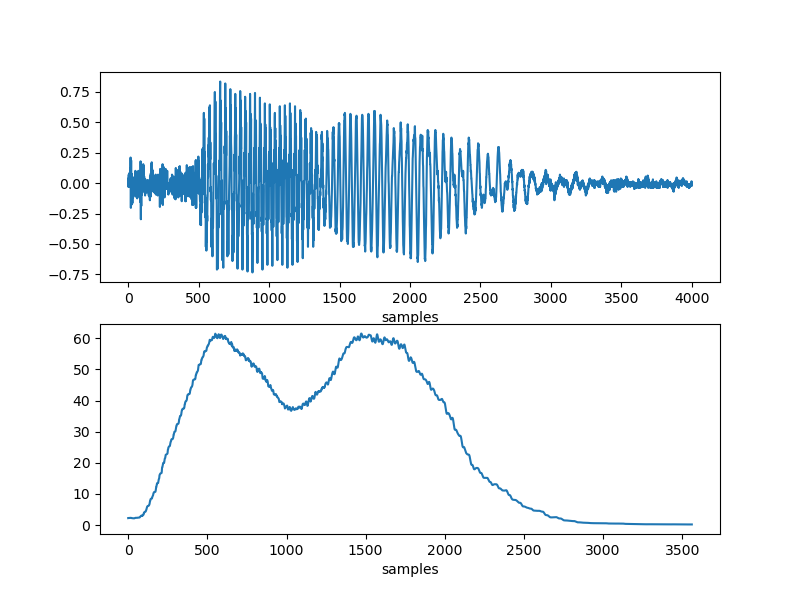

Text(0.5, 0, 'samples')

In [12]:
%matplotlib notebook
#Localized energy
from tds_utils import energia
seg = y[15500:19500+1]

#20 ms window
N= int(0.040*fs) #length in samples
h = sig.boxcar(N) #hamming window

#compute energy
e = energia(seg,h)

#plot signal and energy
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(seg)
plt.xlabel('samples')
plt.subplot(212)
plt.plot(e)
plt.xlabel('samples')

* 3.2- Observe el efecto del tamaño de la ventana ¿Qué ocurre si el tamaño de la ventan es muy pequeño, por ejemplo 5 ms? ¿y si es muy grande, por ejemplo 40 ms?

<IPython.core.display.Javascript object>


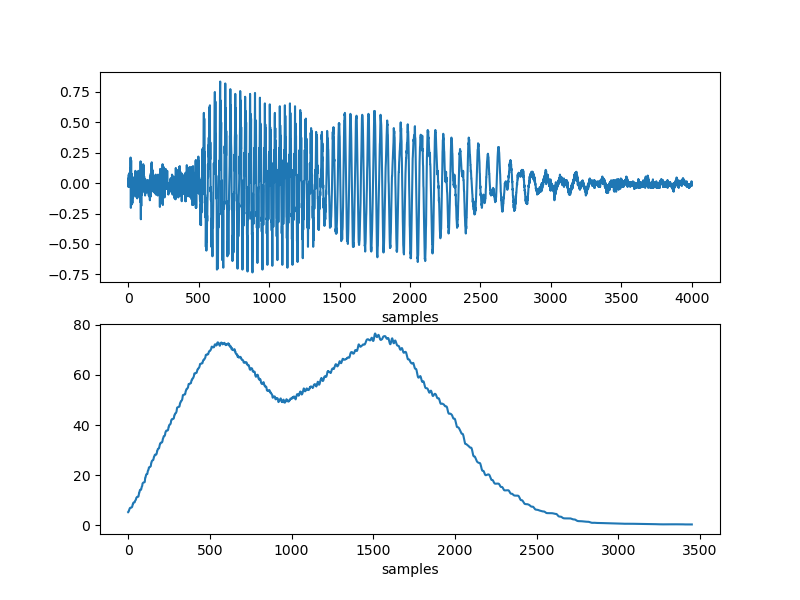

Text(0.5, 0, 'samples')

In [13]:
#5 ms window
N= int(0.05*fs) #length in samples
h = sig.boxcar(N) #hamming window

#compute energy
e = energia(seg,h)

#plot signal and energy
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(seg)
plt.xlabel('samples')
plt.subplot(212)
plt.plot(e)
plt.xlabel('samples')


<IPython.core.display.Javascript object>


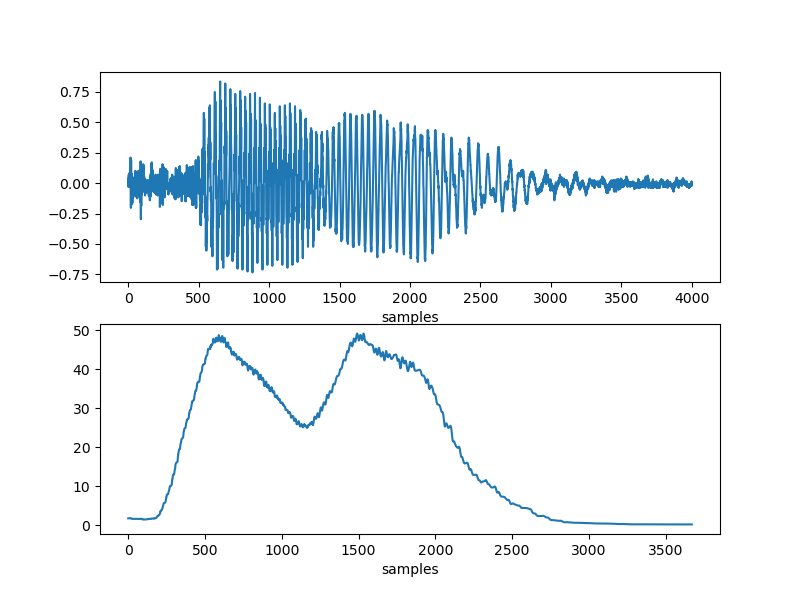

Text(0.5, 0, 'samples')

In [14]:
#40 ms window

N= int(0.040*fs) #length in samples
h = sig.boxcar(N) #hamming window

#compute energy
e = energia(seg,r)

#plot signal and energy
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(seg)
plt.xlabel('samples')
plt.subplot(212)
plt.plot(e)
plt.xlabel('samples')


* 3.3- Para visualizar simultáneamente la evolución de la energía y la tasa de cruces por cero de la señal utilice la función *zcr(seg,h)* para obtener la tasa de cruces por cero localizada.  A continuación, represente zcr debajo de la energía.
* 3.4- Identifique los tramso sonoros y sordos de la señal.

<IPython.core.display.Javascript object>


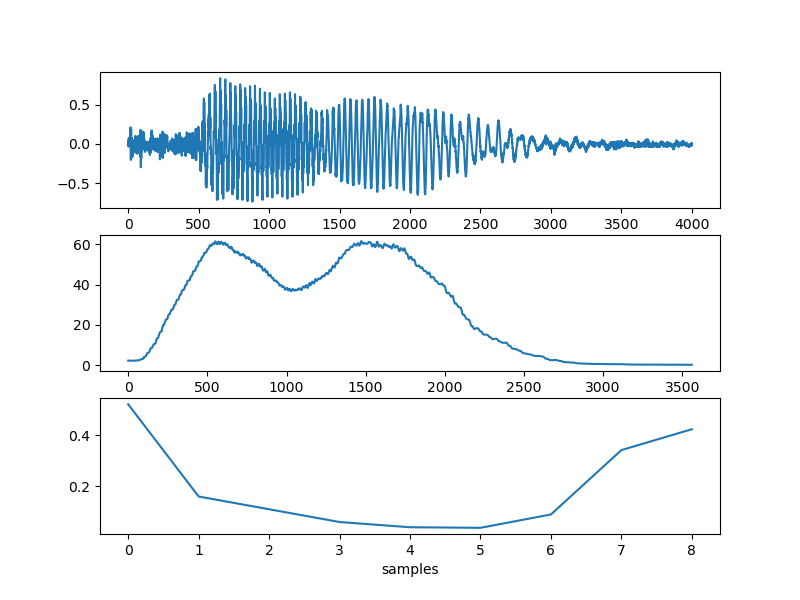

Text(0.5, 0, 'samples')

In [15]:
#%matplotlib inline
from tds_utils import zcr
N=  int(0.040*fs)#length in samples
h =  sig.boxcar(N)#hamming window

#compute energy
e = energia(seg,h)
z = zcr(seg,h)


#plot signal and energy
plt.figure(figsize = (8,6))
plt.subplot(311)
plt.plot(seg)
plt.subplot(312)
plt.plot(e)
plt.subplot(313)
plt.plot(z)
plt.xlabel('samples')

## Ejercicio 4. Espectrograma

* 4.1-Obtenga un espectrograma de banda ancha (por ejemplo longitud de ventana de 128 muestras) y otro de banda estrecha (por ejemplo longitud de ventana de 1024 muestras) para la señal de audio, *y* (completa confront.wav). Para ello utilice la función *my_spectrogram(sig,N,fs)*, donde $N$ es el tamaño de la ventana en muestras.

* 4.2-¿Cuál tiene mayor resolución en frecuencia? ¿cuál tiene mayor resolución temporal?

<IPython.core.display.Javascript object>


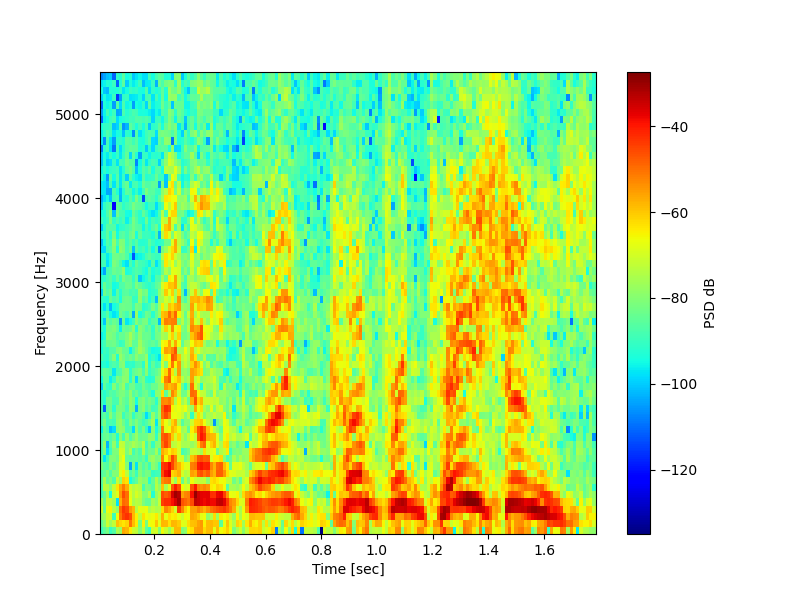

/home/alumno/anaconda3/bin/tema5_student/tds_utils.py:207: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pm = plt.pcolormesh(t, f, 10*np.log10(Sxx),cmap = 'jet')


In [16]:
import importlib
import tds_utils
importlib.reload(tds_utils)

my_spectrogram(y,128,fs)
#En este caso la N al ser más pequeña vamos a tener una buena resolución temporal por lo que será mejor el
#análisis de formantes. Sería una banda ancha.


<IPython.core.display.Javascript object>


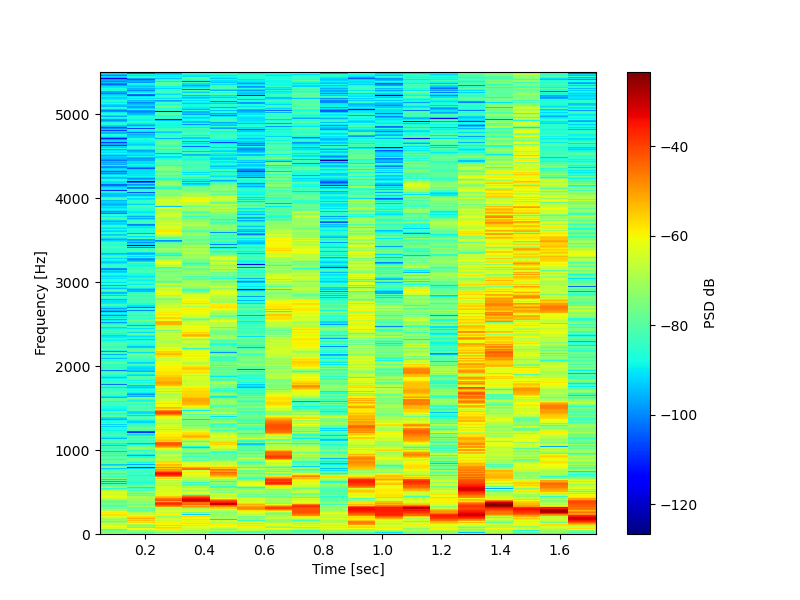

In [17]:
import importlib
import tds_utils
importlib.reload(tds_utils)

my_spectrogram(y,1024,fs)

#En este caso la N al ser grande, tenemos una buena resolución frecuencial por lo que será mejor el análisis
#del picht y de armónicos, seria banda estrecha.
#¿Cuál es mejor? Dependiendo para lo quiera usar, si para analizar formantes o el picht y armónicos.



## Ejercicio 5. Predicción Lineal

* 5.1- Obtenga una trama de la señal original (y), entre las muestras 14000:14330 (s2)

* 5.2- Determine aproximadamente el número de coeficientes de predicción lineal ($p$) de la señal de entrada necesarios para representar adecuadamente el efecto del tracto vocal, utilice una ventana Hamming de 30 ms (s) y la función: 
 *predlin(s2,p,h)*

<IPython.core.display.Javascript object>


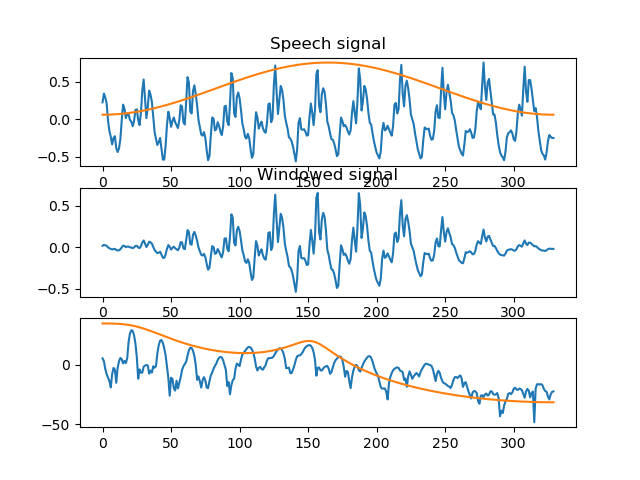

In [18]:
%matplotlib notebook
# to match matlab we need to use spectrum module conda install -c conda-forge spectrum 
import sys
import scipy.signal as sig
sys.path.append('../')
from tds_utils import *
import scipy.io.wavfile as wf

filename = 'confront.wav'

fs,y = wf.read(filename)

#obtain frame s2
s2 = y[14000:14330]
#set LPC order
p = 4

N= int(0.030*fs) #length in samples
h = sig.hamming(N)  #hamming window

predlin(s2, p, h)

#La línea naranja va a variar según el p que meta, es decir, quiero que siga la envolvente de la señal. Quiero
#que se ajuste bien al azul.

## Ejercicio 6. Estimación de pitch: autocorrelación, spectrum, cepstrum

* Obtenga dos tramas de la señal original (sig), trama 1: muestras 14200-14475 y trama 2: muestras 9200:9475.
* Obtenga y represente la autocorrelación de ambas tramas con la función:
 *[k,c] = xcorr(trama) *
 
    En *c* se almacenarán los valores de la autocorrelación y en *k* los valores de los desplazamientos.
 
    Determine si se trata de tramas sonoras o sordas. En el caso de que alguna de las tramas sea sonora, estime el pitch o frecuencia fundamental. 


* Obtenga el espectro de ambas tramas con la función: *myspectra(trama,fs)* 

    Utilice ahora los espectros para determinar si se trata de tramas sonoras o sordas. En el caso de que alguna de las tramas sea sonora, estime el pitch o frecuencia fundamental.

* Realice un análisis cepstral de ambas tramas utilizando la función:*complex_cepstrum(trama,fs)*

    Utilice ahora el cepstrum para determinar si se trata de tramas sonoras o sordas. En el caso de que alguna de las tramas sea sonora, estime el pitch o frecuencia fundamental.

* Compare las estimaciones obtenidas utilizando los diferentes métodos.
 

<IPython.core.display.Javascript object>


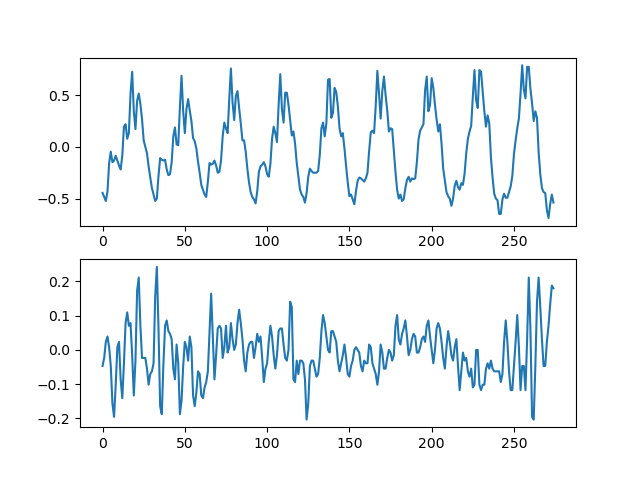

In [19]:
import sys
import scipy.signal
sys.path.append('../')
import tds_utils
import scipy.io.wavfile as wf

filename = 'confront.wav'

fs,y = wf.read(filename)

s1 = y[14200:14475]
s2 = y[9200:9475]

plt.figure()
plt.subplot(211)
plt.plot(s1)
plt.subplot(212)
plt.plot(s2)

#Dibujamos dos tramas s1 y s2 segun vamos a usarlas después, usando la señal y de otros apartados
#En este caso en el eje y tendremos muestras

<IPython.core.display.Javascript object>


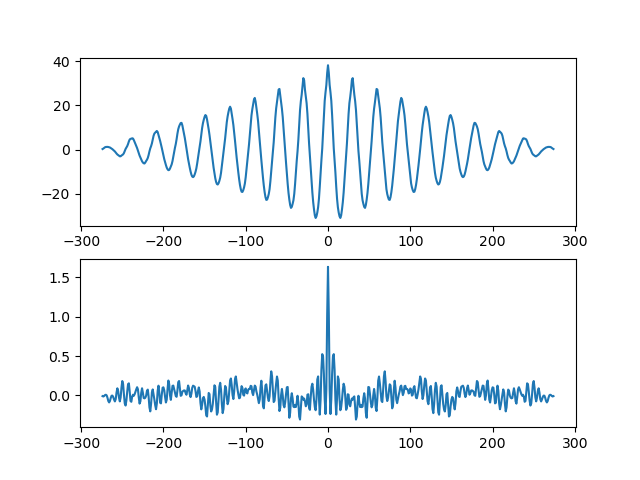

In [20]:
#1 Use correlation

[k1,c1] = xcorr(s1,s1)
[k2,c2] = xcorr(s2,s2)

plt.figure()
plt.subplot(211)
plt.plot(k1,c1)
plt.subplot(212)
plt.plot(k2,c2)

#Calculamos la autocorrelación de cada trama,es decir, resaltamos las periodicidades de cada señal
#Tenemos To deberemos calcular la inversa para sacar el periodo pero antes calculamos el espectro

<IPython.core.display.Javascript object>


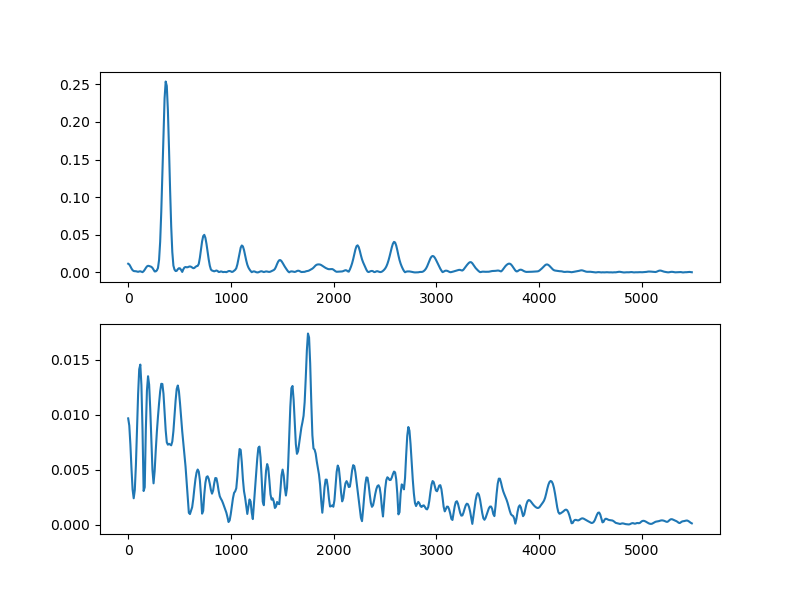

In [21]:
#2 Use fft

psd1,f1 = my_spectra(s1,fs)
psd2,f2 = my_spectra(s2,fs)

idx = f1 >= 0
plt.figure(figsize=(8,6))
plt.subplot(211)

plt.plot(f1[idx],psd1[idx])

plt.subplot(212)
plt.plot(f2[idx],psd2[idx])

<IPython.core.display.Javascript object>


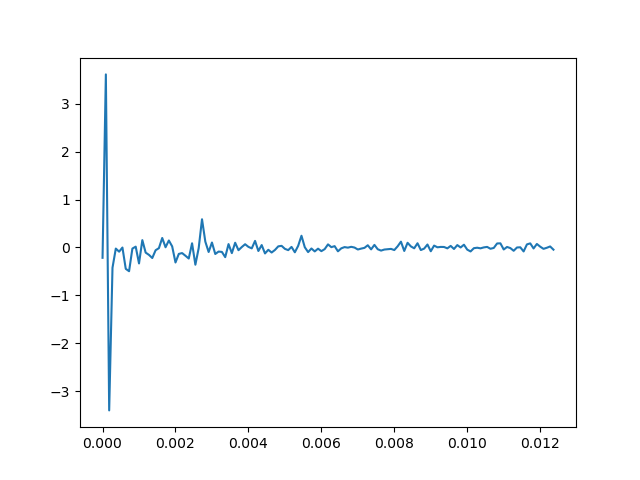

<IPython.core.display.Javascript object>


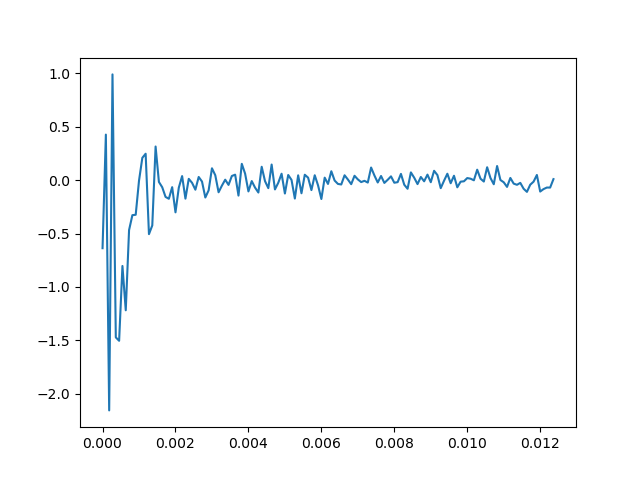

In [22]:
#use cepstrum

ceps,ndelay = complex_cepstrum(s1)
ceps2,ndelay2 = complex_cepstrum(s2)
plt.close('all')
plt.plot(np.arange(int(len(ceps)/2))/fs,ceps[:int(len(ceps)/2)])

plt.figure()
plt.plot(np.arange(int(len(ceps2)/2))/fs,ceps2[:int(len(ceps2)/2)])